## 사용할 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import datetime

In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\m

## 데이터 불러오기

In [2]:
energy = pd.read_csv('data/energy.csv')
df_dangjin_fcst = pd.read_csv('data/dangjin_fcst_data.csv')
df_ulsan_fcst = pd.read_csv('data/ulsan_fcst_data.csv')

In [3]:
energy.head()

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0


In [4]:
dangjin_fcst = df_dangjin_fcst.copy()
dangjin_fcst[20:70]

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
20,2018-03-01 14:00:00,4.0,-2.0,60.0,7.1,314.0,1.0
21,2018-03-01 14:00:00,7.0,-2.0,60.0,6.7,323.0,1.0
22,2018-03-01 14:00:00,10.0,-2.0,55.0,6.7,336.0,1.0
23,2018-03-01 14:00:00,13.0,-4.0,55.0,5.5,339.0,1.0
24,2018-03-01 14:00:00,16.0,-5.0,60.0,4.3,344.0,1.0
25,2018-03-01 14:00:00,19.0,-2.0,55.0,2.0,345.0,1.0
26,2018-03-01 14:00:00,22.0,1.0,45.0,0.8,256.0,1.0
27,2018-03-01 14:00:00,25.0,3.0,50.0,2.3,270.0,1.0
28,2018-03-01 14:00:00,28.0,1.0,55.0,1.9,264.0,1.0
29,2018-03-01 14:00:00,31.0,-1.0,70.0,1.6,68.0,1.0


In [5]:
ulsan_fcst = df_ulsan_fcst.copy()
ulsan_fcst.head()

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 11:00:00,7.0,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 11:00:00,10.0,3.0,30.0,1.9,309.0,2.0
3,2018-03-01 11:00:00,13.0,0.0,40.0,1.5,318.0,2.0
4,2018-03-01 11:00:00,16.0,-1.0,45.0,1.8,308.0,2.0


기상 예보는 전날 14시(오후 2시) 예보를 선형보간하여 사용하였습니다.

※ 기상 예보 전치리 과정 : https://dacon.io/competitions/official/235720/codeshare/2499?page=1&dtype=recent

In [6]:
dangjin_fcst['Forecast_time'] = pd.to_datetime(dangjin_fcst['Forecast time'])
ulsan_fcst['Forecast_time'] = pd.to_datetime(ulsan_fcst['Forecast time'])

In [7]:
dangjin_fcst_23 = dangjin_fcst[dangjin_fcst['Forecast_time'].dt.hour==23]
ulsan_fcst_23 = ulsan_fcst[ulsan_fcst['Forecast_time'].dt.hour==23]

In [8]:
dangjin_fcst_23 = dangjin_fcst_23[(dangjin_fcst_23['forecast']>=4)&(dangjin_fcst_23['forecast']<=22)]
ulsan_fcst_23 = ulsan_fcst_23[(ulsan_fcst_23['forecast']>=10)&(ulsan_fcst_23['forecast']<=33)]

In [9]:
def to_date(x):
    return pd.DateOffset(hours=x)

dangjin_fcst_23['Forecast_time'] = dangjin_fcst_23['Forecast_time'] + dangjin_fcst_23['forecast'].map(to_date)
ulsan_fcst_23['Forecast_time'] = ulsan_fcst_23['Forecast_time'] + ulsan_fcst_23['forecast'].map(to_date)

D:\Anaconda\envs\data_engeneering\lib\site-packages\pandas\core\arrays\datetimelike.py:1111: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [10]:
dangjin_fcst_23 = dangjin_fcst_23[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]
ulsan_fcst_23 = ulsan_fcst_23[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]

In [11]:
dangjin_fcst_23

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
74,2018-03-02 03:00:00,-3.0,55.0,5.0,339.0,1.0
75,2018-03-02 06:00:00,-4.0,60.0,4.1,353.0,1.0
76,2018-03-02 09:00:00,-2.0,55.0,1.1,360.0,1.0
77,2018-03-02 12:00:00,2.0,45.0,1.0,259.0,1.0
78,2018-03-02 15:00:00,3.0,55.0,2.6,274.0,1.0
...,...,...,...,...,...,...
162136,2021-03-01 09:00:00,8.0,90.0,4.0,97.0,4.0
162137,2021-03-01 12:00:00,9.0,90.0,5.4,3.0,4.0
162138,2021-03-01 15:00:00,10.0,90.0,2.7,360.0,4.0
162139,2021-03-01 18:00:00,6.0,85.0,7.6,17.0,4.0


In [12]:
dangjin_fcst_23_ = pd.DataFrame()
dangjin_fcst_23_['Forecast_time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')

ulsan_fcst_23_ = pd.DataFrame()
ulsan_fcst_23_['Forecast_time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')

In [13]:
dangjin_fcst_23_ = pd.merge(dangjin_fcst_23_, dangjin_fcst_23, on='Forecast_time', how='outer')
ulsan_fcst_23_ = pd.merge(ulsan_fcst_23_, ulsan_fcst_23, on='Forecast_time', how='outer')

In [14]:
temp_dangjin_fcst = df_dangjin_fcst.copy()
temp_dangjin_fcst['Forecast_time'] = pd.to_datetime(df_dangjin_fcst['Forecast time'])
temp_dangjin_fcst = temp_dangjin_fcst[(temp_dangjin_fcst['Forecast_time'].dt.year == 2018) & 
                                      (temp_dangjin_fcst['Forecast_time'].dt.hour ==14) & 
                                      (temp_dangjin_fcst['Forecast_time'].dt.month == 3) &
                                     (temp_dangjin_fcst['Forecast_time'].dt.day == 1) &
                                     (temp_dangjin_fcst['forecast'] == 10)] 

temp_ulsan_fcst = df_ulsan_fcst.copy()
temp_ulsan_fcst['Forecast_time'] = pd.to_datetime(df_ulsan_fcst['Forecast time'])
temp_ulsan_fcst = temp_ulsan_fcst[(temp_ulsan_fcst['Forecast_time'].dt.year == 2018) & 
                                      (temp_ulsan_fcst['Forecast_time'].dt.hour ==14) & 
                                      (temp_ulsan_fcst['Forecast_time'].dt.month == 3) &
                                     (temp_ulsan_fcst['Forecast_time'].dt.day == 1) &
                                     (temp_ulsan_fcst['forecast'] == 10)] 

In [15]:
temp_dangjin_fcst = temp_dangjin_fcst.drop(['forecast', 'Forecast time', 'Forecast_time'], axis=1)
temp_ulsan_fcst = temp_ulsan_fcst.drop(['forecast', 'Forecast time', 'Forecast_time'], axis=1)

In [16]:
temp_dangjin_fcst

,Temperature,Humidity,WindSpeed,WindDirection,Cloud
22,-2.0,55.0,6.7,336.0,1.0


In [17]:
temp_ulsan_fcst

,Temperature,Humidity,WindSpeed,WindDirection,Cloud
22,0.0,40.0,1.5,318.0,2.0


In [18]:
dangjin_fcst_23_['Temperature'][0] = -2.0
dangjin_fcst_23_['Humidity'][0] = 55.0
dangjin_fcst_23_['WindSpeed'][0] = 6.7
dangjin_fcst_23_['WindDirection'][0] = 336.0
dangjin_fcst_23_['Cloud'][0] = 1.0

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from

In [19]:
ulsan_fcst_23_['Temperature'][0] = 0.0
ulsan_fcst_23_['Humidity'][0] = 40.0
ulsan_fcst_23_['WindSpeed'][0] = 1.5
ulsan_fcst_23_['WindDirection'][0] = 318.0
ulsan_fcst_23_['Cloud'][0] = 2.0

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from

In [20]:
dangjin_fcst = dangjin_fcst_23_.interpolate()
ulsan_fcst = ulsan_fcst_23_.interpolate()

In [21]:
dangjin_fcst['Forecast_time'] = dangjin_fcst['Forecast_time'].astype(str)
ulsan_fcst['Forecast_time'] = ulsan_fcst['Forecast_time'].astype(str)

In [22]:
def transform_wind_to_vector(df_):
    df = df_.copy()

    wv = df['WindSpeed']

    # Convert to radians.
    wd_rad = df['WindDirection']*np.pi / 180

    # Calculate the wind x and y components.
    df['Wind_X'] = wv*np.cos(wd_rad)
    df['Wind_Y'] = wv*np.sin(wd_rad)
    
    return df

In [23]:
def transform_datetime_to_signal(df_):
    df = df_.copy()
    date_time = pd.to_datetime(df['Forecast_time'], format='%Y.%m.%d %H:%M')
    timestamp_s = date_time.map(datetime.datetime.timestamp)

    day = 24*60*60
    year = (365.2425)*day

    df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
    df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
    df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
    df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

    return df

In [24]:
dangjin_fcst = transform_wind_to_vector(dangjin_fcst)
dangjin_fcst = transform_datetime_to_signal(dangjin_fcst)

In [25]:
dangjin_fcst

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Wind_X,Wind_Y,Day sin,Day cos,Year sin,Year cos
0,2018-03-02 00:00:00,-2.000000,55.000000,6.700000,336.000000,1.0,6.120755,-2.725136,-7.071068e-01,-7.071068e-01,0.858280,0.513182
1,2018-03-02 01:00:00,-2.333333,55.000000,6.133333,337.000000,1.0,5.645763,-2.396484,-8.660254e-01,-5.000000e-01,0.858648,0.512566
2,2018-03-02 02:00:00,-2.666667,55.000000,5.566667,338.000000,1.0,5.161323,-2.085310,-9.659258e-01,-2.588190e-01,0.859015,0.511951
3,2018-03-02 03:00:00,-3.000000,55.000000,5.000000,339.000000,1.0,4.667902,-1.791840,-1.000000e+00,-3.848660e-12,0.859382,0.511335
4,2018-03-02 04:00:00,-3.333333,56.666667,4.700000,343.666667,1.0,4.510317,-1.321758,-9.659258e-01,2.588190e-01,0.859748,0.510719
...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,5.333333,83.333333,7.466667,20.333333,4.0,7.001396,2.594527,5.000000e-01,-8.660254e-01,0.858846,0.512234
26300,2021-03-01 20:00:00,4.666667,81.666667,7.333333,23.666667,4.0,6.716573,2.943710,2.588190e-01,-9.659258e-01,0.859213,0.511618
26301,2021-03-01 21:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,4.907520e-12,-1.000000e+00,0.859579,0.511002
26302,2021-03-01 22:00:00,4.000000,80.000000,7.200000,27.000000,4.0,6.415247,3.268732,-2.588190e-01,-9.659258e-01,0.859945,0.510386


In [26]:
dangjin_fcst_23_.tail(10)

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
26294,2021-03-01 14:00:00,NaN,NaN,NaN,NaN,NaN
26295,2021-03-01 15:00:00,10.0,90.0,2.7,360.0,4.0
26296,2021-03-01 16:00:00,NaN,NaN,NaN,NaN,NaN
26297,2021-03-01 17:00:00,NaN,NaN,NaN,NaN,NaN
26298,2021-03-01 18:00:00,6.0,85.0,7.6,17.0,4.0
26299,2021-03-01 19:00:00,NaN,NaN,NaN,NaN,NaN
26300,2021-03-01 20:00:00,NaN,NaN,NaN,NaN,NaN
26301,2021-03-01 21:00:00,4.0,80.0,7.2,27.0,4.0
26302,2021-03-01 22:00:00,NaN,NaN,NaN,NaN,NaN
26303,2021-03-01 23:00:00,NaN,NaN,NaN,NaN,NaN


In [27]:
ulsan_fcst = transform_wind_to_vector(ulsan_fcst)
ulsan_fcst = transform_datetime_to_signal(ulsan_fcst)

In [28]:
ulsan_fcst

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Wind_X,Wind_Y,Day sin,Day cos,Year sin,Year cos
0,2018-03-02 00:00:00,0.0,40.000000,1.500000,318.000000,2.000000,1.114717,-1.003696,-0.707107,-7.071068e-01,0.858280,0.513182
1,2018-03-02 01:00:00,0.0,39.444444,1.511111,318.222222,1.888889,1.126888,-1.006768,-0.866025,-5.000000e-01,0.858648,0.512566
2,2018-03-02 02:00:00,0.0,38.888889,1.522222,318.444444,1.777778,1.139098,-1.009760,-0.965926,-2.588190e-01,0.859015,0.511951
3,2018-03-02 03:00:00,0.0,38.333333,1.533333,318.666667,1.666667,1.151349,-1.012673,-1.000000,-3.848660e-12,0.859382,0.511335
4,2018-03-02 04:00:00,0.0,37.777778,1.544444,318.888889,1.555556,1.163640,-1.015505,-0.965926,2.588190e-01,0.859748,0.510719
...,...,...,...,...,...,...,...,...,...,...,...,...
26302,2021-03-01 22:00:00,12.0,80.000000,4.233333,27.000000,4.000000,3.771928,1.921893,-0.258819,-9.659258e-01,0.859945,0.510386
26303,2021-03-01 23:00:00,10.0,80.000000,4.666667,22.000000,4.000000,4.326858,1.748164,-0.500000,-8.660254e-01,0.860311,0.509769
26304,2021-03-02 00:00:00,8.0,80.000000,5.100000,17.000000,4.000000,4.877154,1.491096,-0.707107,-7.071068e-01,0.860676,0.509153
26305,2021-03-02 03:00:00,6.0,80.000000,7.200000,10.000000,4.000000,7.090616,1.250267,-1.000000,-7.470864e-12,0.861769,0.507301


In [51]:
dangjin_fcst.to_csv("data/dangjin_fcst_wind_time.csv", index=False)
ulsan_fcst.to_csv("data/ulsan_fcst_wind_time.csv", index=False)

## 학습 데이터 전처리

In [29]:
def train_datast(energy_df, fcst_df, target):
    # 일기 예보 있는 날짜만 선택
    energy = energy_df.loc[24:]
    energy.index = range(energy.shape[0])
    
    # 발전량 데이터가 있는 날짜만 선택
    fcst = fcst_df.loc[:25608-1]
    fcst.index = range(fcst.shape[0])
    
    # 발전량과 일기예보 연결
    concat_df = pd.concat([energy, fcst], axis=1)
    
    # 예보 시간 및 날짜 정보 feature로 추가
    concat_df['date'] = concat_df['Forecast_time'].str.split(' ').str[0]
    concat_df['hour'] = concat_df['Forecast_time'].str.split(' ').str[1].str.split(':').str[0].astype(int)
    
    concat_df['year'] = concat_df['date'].str.split('-').str[0].astype(int)
    concat_df['month'] = concat_df['date'].str.split('-').str[1].astype(int)
    concat_df['day'] = concat_df['date'].str.split('-').str[2].astype(int)
    
    # 예보 시간, 날짜, 기상 예보 및 발전량 선택
    # feature_df = concat_df[['year', 'month', 'day', 'hour', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', target]]
    feature_df = concat_df[[#'year', 'month', 'day', 'hour', 
                            'Year sin', 'Year cos', 'Day sin', 'Day cos',
                            'Temperature', 'Humidity', 
                            #'WindSpeed', 'WindDirection',
                            'Wind_X', 'Wind_Y', 
                            'Cloud', target]]
    
    # 마지막 30일을 검증데이터셋으로 나머지를 학습 데이터셋으로 선택
    train_df = feature_df.iloc[:-24*30]
    val_df = feature_df.iloc[-24*30:]
    
    # 발전량이 0인 데이터를 제외
    train_df = train_df[train_df[target]!=0]
    
    #train_x = train_df.loc[:, 'year':'Cloud'].to_numpy()
    train_x = train_df.loc[:, :'Cloud'].to_numpy()
    train_y = train_df[target].to_numpy()
    
    #val_x = val_df.loc[:, 'year':'Cloud'].to_numpy()
    val_x = val_df.loc[:, :'Cloud'].to_numpy()
    val_y = val_df[target].to_numpy()
    
    return train_x, train_y, val_x, val_y

## LightGBM Custom Metric

In [30]:
def nmae_10(y_pred, dataset):
    y_true = dataset.get_label()
    
    absolute_error = abs(y_true - y_pred)
    absolute_error /= capacity
    
    target_idx = np.where(y_true>=capacity*0.1)
    
    nmae = 100 * absolute_error[target_idx].mean()
    
    return 'score', nmae, False

## Validation Metric

In [31]:
def sola_nmae(answer, pred):
    absolute_error = np.abs(answer - pred)
    
    absolute_error /= capacity
    
    target_idx = np.where(answer>=capacity*0.1)
    
    nmae = 100 * absolute_error[target_idx].mean()
    
    return nmae

## LightGBM Hyperparameter

In [32]:
params = {
    'learning_rate': 0.03,
    'num_iterations': 1000,
    'max_depth': 16,
    #'boosting': 'rf',
    #'feature_fraction': 0.8,
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

### 당진수상태양광 예측 모델 학습

In [33]:
train_x, train_y, val_x, val_y = train_datast(energy, dangjin_fcst, target='dangjin_floating')
train_dataset = lgb.Dataset(train_x, train_y)
val_dataset = lgb.Dataset(val_x, val_y)
capacity = 1000
dangjin_floating_model = lgb.train(params, train_dataset, 10000, val_dataset, feval=nmae_10, verbose_eval=500, early_stopping_rounds=100)

D:\Anaconda\envs\data_engeneering\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1709
[LightGBM] [Info] Number of data points in the train set: 12378, number of used features: 9
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 247.345048
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[194]	valid_0's l1: 39.1197	valid_0's score: 8.40416


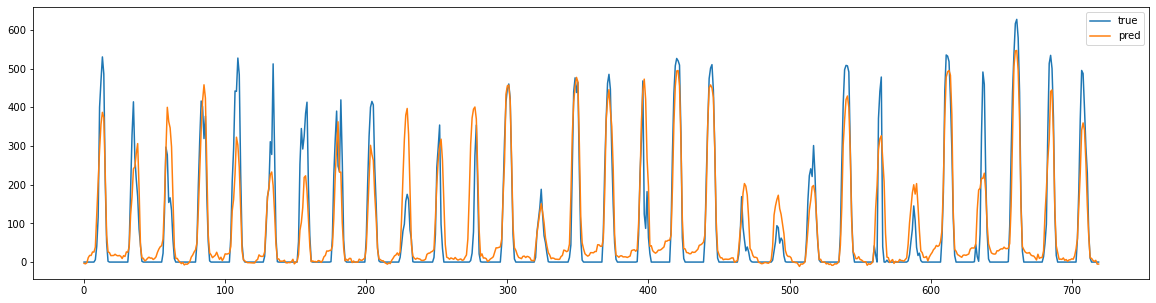

CV Score :  8.404156824264037


In [34]:
pred = dangjin_floating_model.predict(val_x)

plt.figure(figsize=(20,5))
plt.plot(val_y, label='true')
plt.plot(pred, label='pred')
plt.legend()
plt.show()
print('CV Score : ', sola_nmae(val_y, pred))

### 당진자재창고태양광 예측 모델 학습

In [35]:
train_x, train_y, val_x, val_y = train_datast(energy, dangjin_fcst, target='dangjin_warehouse')
train_dataset = lgb.Dataset(train_x, train_y)
val_dataset = lgb.Dataset(val_x, val_y)
capacity = 700
dangjin_warehouse_model = lgb.train(params, train_dataset, 10000, val_dataset, feval=nmae_10, verbose_eval=500, early_stopping_rounds=100)

D:\Anaconda\envs\data_engeneering\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1709
[LightGBM] [Info] Number of data points in the train set: 11949, number of used features: 9
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 193.765671
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's l1: 55.1287	valid_0's score: 9.95871


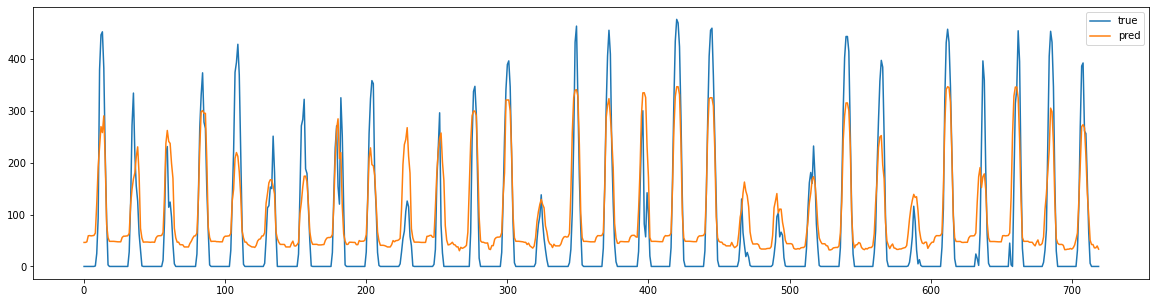

CV Score :  9.958705503824273


In [36]:
pred = dangjin_warehouse_model.predict(val_x)

plt.figure(figsize=(20,5))
plt.plot(val_y, label='true')
plt.plot(pred, label='pred')
plt.legend()
plt.show()
print('CV Score : ', sola_nmae(val_y, pred))

### 당진태양광 예측 모델 학습

In [37]:
train_x, train_y, val_x, val_y = train_datast(energy, dangjin_fcst, target='dangjin')
train_dataset = lgb.Dataset(train_x, train_y)
val_dataset = lgb.Dataset(val_x, val_y)
capacity = 1000
dangjin_model = lgb.train(params, train_dataset, 10000, val_dataset, feval=nmae_10, verbose_eval=500, early_stopping_rounds=100)

D:\Anaconda\envs\data_engeneering\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1709
[LightGBM] [Info] Number of data points in the train set: 11349, number of used features: 9
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 308.414486
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's l1: 90.4279	valid_0's score: 10.5316


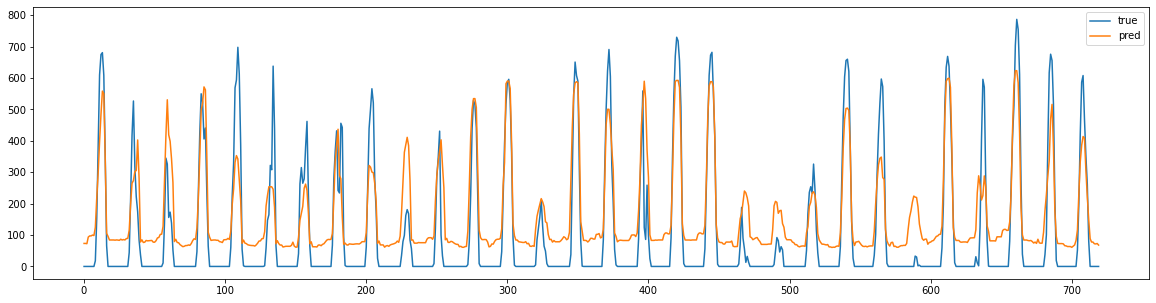

CV Score :  10.531603454127803


In [38]:
pred = dangjin_model.predict(val_x)

plt.figure(figsize=(20,5))
plt.plot(val_y, label='true')
plt.plot(pred, label='pred')
plt.legend()
plt.show()
print('CV Score : ', sola_nmae(val_y, pred))

### 울산태양광 예측 모델 학습

In [39]:
train_x, train_y, val_x, val_y = train_datast(energy, ulsan_fcst, target='ulsan')
train_dataset = lgb.Dataset(train_x, train_y)
val_dataset = lgb.Dataset(val_x, val_y)
capacity = 500
ulsan_model = lgb.train(params, train_dataset, 10000, val_dataset, feval=nmae_10, verbose_eval=500, early_stopping_rounds=100)

D:\Anaconda\envs\data_engeneering\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1706
[LightGBM] [Info] Number of data points in the train set: 11811, number of used features: 9
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 135.559394
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[244]	valid_0's l1: 13.7002	valid_0's score: 5.70032


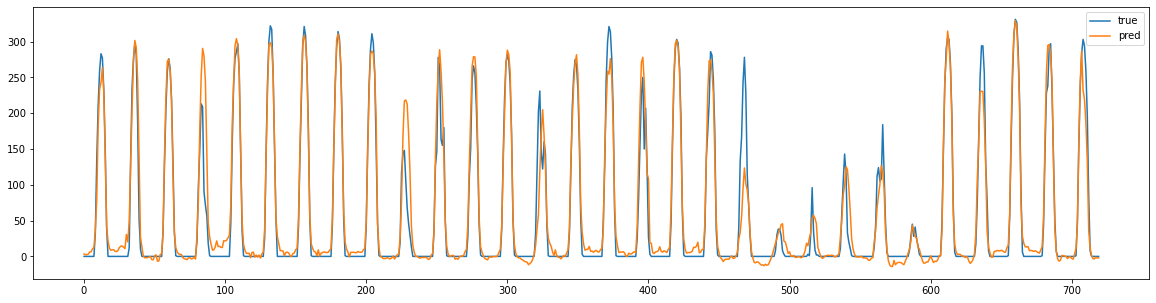

CV Score :  5.700323341509686


In [40]:
pred = ulsan_model.predict(val_x)

plt.figure(figsize=(20,5))
plt.plot(val_y, label='true')
plt.plot(pred, label='pred')
plt.legend()
plt.show()
print('CV Score : ', sola_nmae(val_y, pred))

## 테스트 데이터 전처리

In [41]:
def test_datast(fcst_df):
    start = '2021-02-01 00:00:00'
    end = '2021-02-28 23:00:00'
    
    start_idx = fcst_df[fcst_df['Forecast_time']==start].index[0]
    end_idx = fcst_df[fcst_df['Forecast_time']==end].index[0]
    
    test_df = fcst_df.loc[start_idx:end_idx, :].copy()
    
    test_df['date'] = test_df['Forecast_time'].str.split(' ').str[0]
    test_df['hour'] = test_df['Forecast_time'].str.split(' ').str[1].str.split(':').str[0].astype(int)
    
    test_df['year'] = test_df['date'].str.split('-').str[0].astype(int)
    test_df['month'] = test_df['date'].str.split('-').str[1].astype(int)
    test_df['day'] = test_df['date'].str.split('-').str[2].astype(int)
    
    #test_df = test_df[['year', 'month', 'day', 'hour', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]
    test_df = test_df[[#'year', 'month', 'day', 'hour', 
                        'Year sin', 'Year cos', 'Day sin', 'Day cos',
                        'Temperature', 'Humidity', 
                        #'WindSpeed', 'WindDirection',
                        'Wind_X', 'Wind_Y', 
                        'Cloud']]
    
    test_x = test_df.to_numpy()
    
    return test_x

In [42]:
dangjin_test = test_datast(dangjin_fcst)
ulsan_test = test_datast(ulsan_fcst)

In [50]:
len(dangjin_test)

672

## 각 발전소 발전량 추론

In [43]:
dangjin_floating_pred = dangjin_floating_model.predict(dangjin_test)
dangjin_warehouse_pred = dangjin_warehouse_model.predict(dangjin_test)
dangjin_pred = dangjin_model.predict(dangjin_test)
ulsan_pred = ulsan_model.predict(ulsan_test)

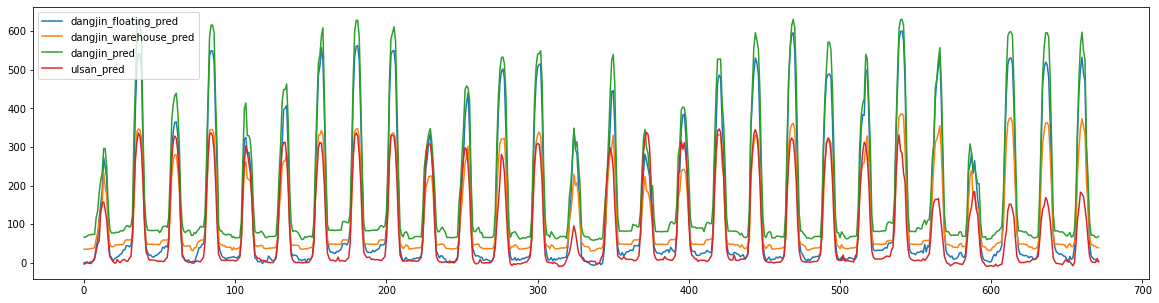

In [44]:
plt.figure(figsize=(20,5))
plt.plot(dangjin_floating_pred, label = 'dangjin_floating_pred')
plt.plot(dangjin_warehouse_pred, label = 'dangjin_warehouse_pred')
plt.plot(dangjin_pred, label = 'dangjin_pred')
plt.plot(ulsan_pred, label = 'ulsan_pred')
plt.legend()
plt.show()

## 제출

In [45]:
# submission = pd.read_csv('data/sample_submission.csv')

In [46]:
# submission.iloc[:24*28, 1] = dangjin_floating_pred
# submission.iloc[:24*28, 2] = dangjin_warehouse_pred
# submission.iloc[:24*28, 3] = dangjin_pred
# submission.iloc[:24*28, 4] = ulsan_pred

In [47]:
# submission

In [48]:
# submission.to_csv('dacon_baseline_wind_time.csv', index=False)